## import Libraries


In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Read Data

In [2]:
# import csv file
df = pd.read_csv('US_Accidents.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(7728394, 46)

In [4]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
#check for null values with sort
pd.isnull(df).sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [9]:
missing_percentages = pd.isnull(df).sum().sort_values(ascending=False)/ len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [10]:
print(type(missing_percentages))

<class 'pandas.core.series.Series'>


<AxesSubplot:>

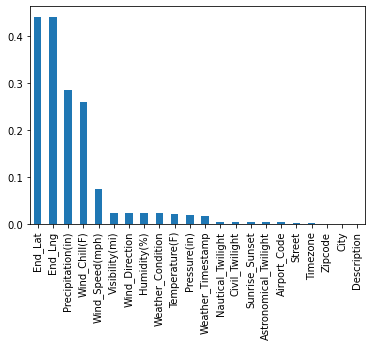

In [11]:
missing_percentages[missing_percentages !=0].plot(kind='bar')

In [12]:
cities = df.City.unique()
print(len(cities))
print(cities[:100])

13679
['Dayton' 'Reynoldsburg' 'Williamsburg' 'Westerville' 'Columbus'
 'Miamisburg' 'Johnstown' 'Dublin' 'Canal Winchester' 'Lebanon' 'Sabina'
 'Goshen' 'Waynesville' 'Springboro' 'Carroll' 'Oregonia' 'Independence'
 'Maple Heights' 'Grove City' 'Findlay' 'Fairborn' 'Piqua' 'New Richmond'
 'Batavia' 'Galena' 'Barberton' 'Akron' 'Mansfield' 'Cleveland' 'Bethel'
 'Pataskala' 'Seville' 'Bellville' 'Troy' 'Wilmington' 'North Olmsted'
 'Groveport' 'Orient' 'Tiro' 'Strongsville' 'Beavercreek' 'Circleville'
 'Peebles' 'Hurricane' 'Xenia' 'Elyria' 'Pickerington' 'Burbank'
 'Zanesville' 'North Baltimore' 'Mount Sterling' 'Tipp City' 'Moraine'
 'Hilliard' 'Bowling Green' 'Maineville' 'Vermilion' 'Milford' 'Brookpark'
 'Fraziers Bottom' 'Cambridge' 'Delaware' 'Moscow' 'Oberlin' 'Sardinia'
 'Lewis Center' 'Urbancrest' 'Brecksville' 'Frankfort' 'Blanchester'
 'Casstown' 'Lima' 'Amelia' 'Newark' 'Springfield' 'Vandalia' 'Galloway'
 'Bloomingburg' 'Gallipolis' 'Lockbourne' 'Milan' 'Mason' 'Millerspo

## Accidents per city

In [13]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

<AxesSubplot:>

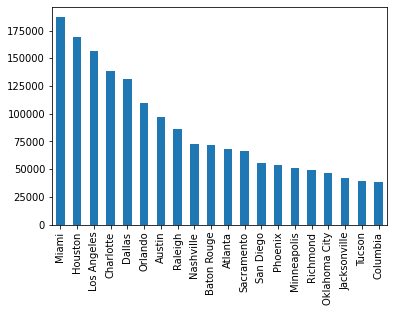

In [14]:
cities_by_accident[:20].plot(kind='bar')

In [15]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]
print(high_accident_cities)


Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Fairview           1002
Sedona             1001
Zephyrhills        1000
Berwyn             1000
Bennettsville      1000
Name: City, Length: 1218, dtype: int64


In [16]:
(len(high_accident_cities)/len(cities)) *100

8.904159660793917

<AxesSubplot:xlabel='City', ylabel='Count'>

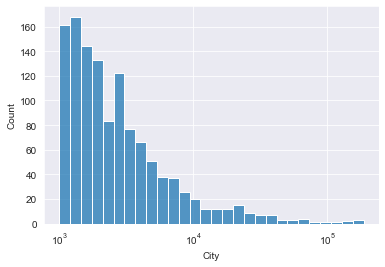

In [17]:
sns.set_style("darkgrid")
sns.histplot(high_accident_cities, log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

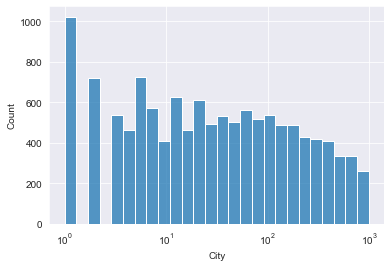

In [18]:
sns.set_style("darkgrid")
sns.histplot(low_accident_cities, log_scale=True)

In [19]:
cities_by_accident[cities_by_accident==1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

In [20]:
states = df.State.unique()
print(len(states))
print(states[:1000])

49
['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']


## Start Time

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [22]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [23]:
print(type(df.Start_Time[0]))

<class 'str'>


In [24]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
print(type(df['End_Time']))
print(df[['Start_Time', 'End_Time']].head())

<class 'pandas.core.series.Series'>
           Start_Time            End_Time
0 2016-02-08 05:46:00 2016-02-08 11:00:00
1 2016-02-08 06:07:59 2016-02-08 06:37:59
2 2016-02-08 06:49:27 2016-02-08 07:19:27
3 2016-02-08 07:23:34 2016-02-08 07:53:34
4 2016-02-08 07:39:07 2016-02-08 08:09:07


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

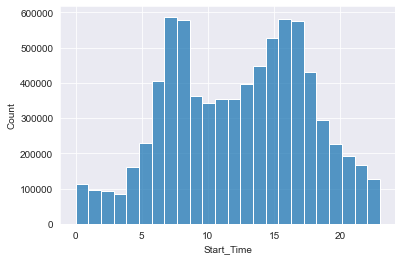

In [25]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

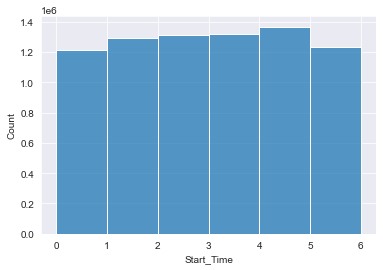

In [26]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=6)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

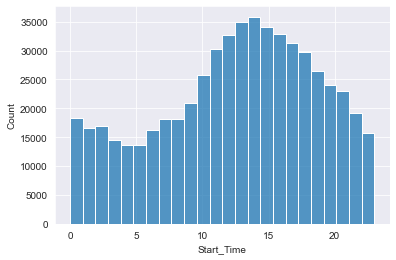

In [27]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==6]
sns.histplot(sunday_start_time.dt.hour, bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

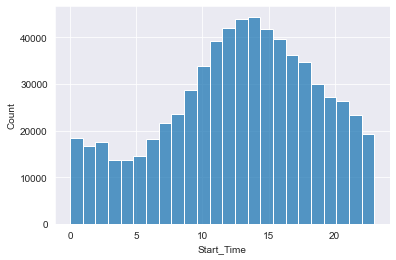

In [28]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==5]
sns.histplot(saturday_start_time.dt.hour, bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

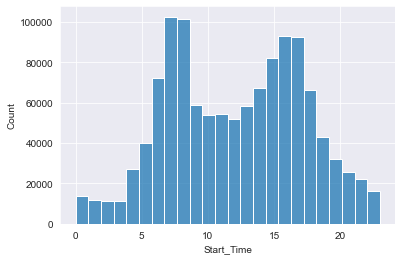

In [29]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek ==0]
sns.histplot(monday_start_time.dt.hour, bins=24)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

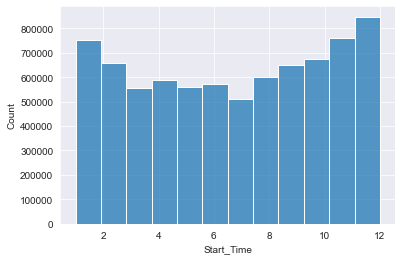

In [30]:
sns.histplot(df.Start_Time.dt.month, bins=12)

In [31]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

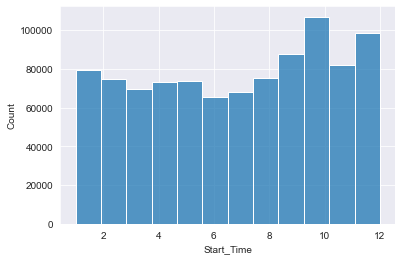

In [32]:
df_2019=df[df.Start_Time.dt.year ==2019]
sns.histplot(df_2019.Start_Time.dt.month, bins=12)

## Start Latitude & Longitude

In [33]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [34]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [35]:
sample_df =df.sample(int(.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

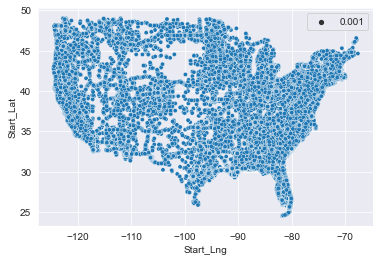

In [36]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=.001)

In [37]:
lat, lon=df.Start_Lng[0], df.Start_Lat[0]
lat,lon

(-84.058723, 39.865147)

In [38]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
    print(x[1])

6769988    34.659670
7079154    33.882860
3697063    47.432644
6416549    25.672687
1330327    41.903419
             ...    
4577891    45.556537
3273282    35.060925
1076193    34.909119
6918451    36.046625
6324149    26.327690
Name: Start_Lat, Length: 100, dtype: float64
6769988   -118.363119
7079154   -118.349980
3697063    -92.920380
6416549    -80.384182
1330327    -88.063034
              ...    
4577891   -122.678500
3273282    -80.956329
1076193    -81.953781
6918451    -86.661046
6324149    -80.170161
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
sample_df =df.sample(int(.01 * len(df)))
lat_lon_pairs = zip(list(df.Start_Lat), list(df.Start_Lng))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## More Visualizations

In [39]:
# Select relevant columns for analysis
selected_columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
                    'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'City', 'County',
                    'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
                    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
                    'Weather_Condition', 'Amenity', 'Bump', 'Crossing']
# Filter data
filtered_data = df[selected_columns]
filtered_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,...,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False


In [40]:
# Handling missing values
missing_values = filtered_data.isnull().sum().sort_values(ascending=False) 
print(missing_values)

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
Pressure(in)          140679
Weather_Timestamp     120228
Airport_Code           22635
Timezone                7808
Zipcode                 1915
City                     253
Description                5
Amenity                    0
Bump                       0
ID                         0
Severity                   0
State                      0
County                     0
Distance(mi)               0
Start_Lng                  0
Start_Lat                  0
End_Time                   0
Start_Time                 0
Crossing                   0
dtype: int64


In [42]:
mean_temperature = filtered_data['Temperature(F)'].mean()
filtered_data['Temperature(F)'].fillna(mean_temperature, inplace=True)

C:\Users\sandr\AppData\Local\Temp\ipykernel_28440\3567628168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Temperature(F)'].fillna(mean_temperature, inplace=True)


In [43]:
# Handling missing values
missing_values = filtered_data.isnull().sum().sort_values(ascending=False) 
print(missing_values)

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Pressure(in)          140679
Weather_Timestamp     120228
Airport_Code           22635
Timezone                7808
Zipcode                 1915
City                     253
Description                5
Amenity                    0
Bump                       0
ID                         0
Temperature(F)             0
Severity                   0
State                      0
County                     0
Distance(mi)               0
Start_Lng                  0
Start_Lat                  0
End_Time                   0
Start_Time                 0
Crossing                   0
dtype: int64


In [44]:
filtered_data.shape

(7728394, 29)

In [45]:
# drop null values
filtered_data.dropna(inplace=True)

C:\Users\sandr\AppData\Local\Temp\ipykernel_28440\2995889695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


In [46]:
# Handling missing values
missing_values = filtered_data.isnull().sum().sort_values(ascending=False) 
print(missing_values)

ID                   0
Airport_Code         0
Bump                 0
Amenity              0
Weather_Condition    0
Precipitation(in)    0
Wind_Speed(mph)      0
Wind_Direction       0
Visibility(mi)       0
Pressure(in)         0
Humidity(%)          0
Wind_Chill(F)        0
Temperature(F)       0
Weather_Timestamp    0
Timezone             0
Severity             0
Zipcode              0
State                0
County               0
City                 0
Description          0
Distance(mi)         0
End_Lng              0
End_Lat              0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Crossing             0
dtype: int64


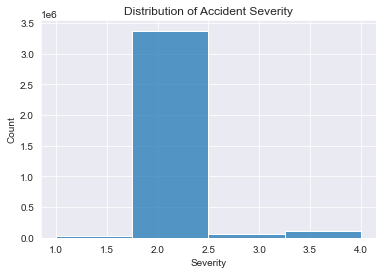

In [47]:
# Histogram of Severity
sns.histplot(data=filtered_data, x='Severity', bins=4)
plt.title('Distribution of Accident Severity')
plt.show()

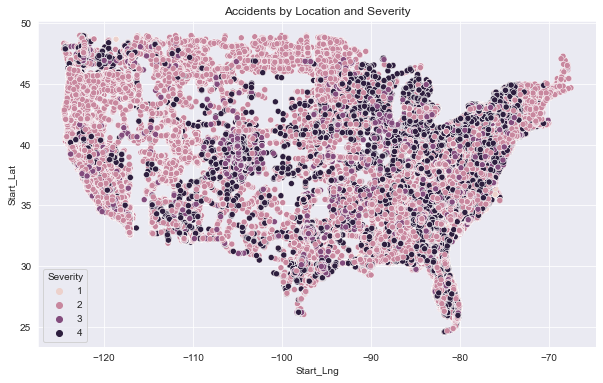

In [48]:
# Scatter plot of Start_Lng vs Start_Lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Start_Lng', y='Start_Lat', hue='Severity')
plt.title('Accidents by Location and Severity')
plt.show()

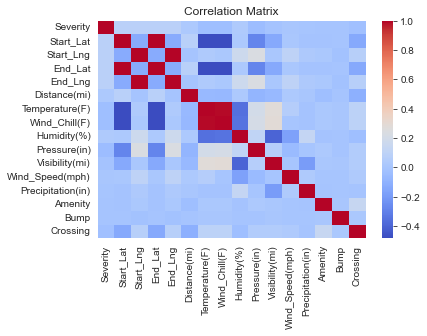

In [49]:
# Correlation matrix
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

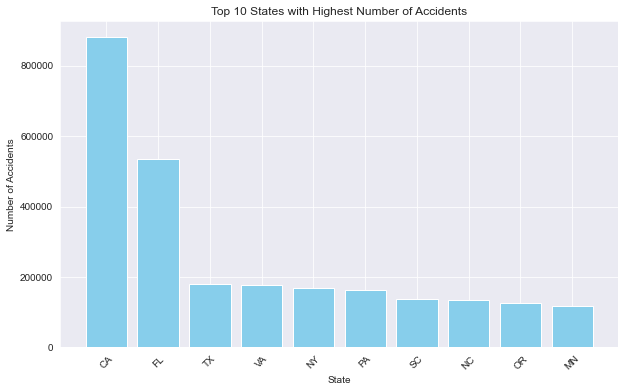

In [50]:
state_counts = filtered_data['State'].value_counts().head(10)

# Plotting the bar chart for top 10 states
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Top 10 States with Highest Number of Accidents')
plt.xticks(rotation=45)
plt.show()

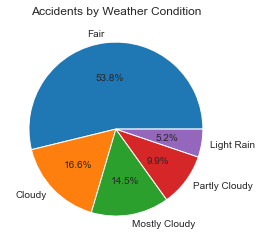

In [51]:
weather_counts = filtered_data['Weather_Condition'].value_counts().head(5)  # Select top 10 weather conditions
plt.pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Accidents by Weather Condition')
plt.show()

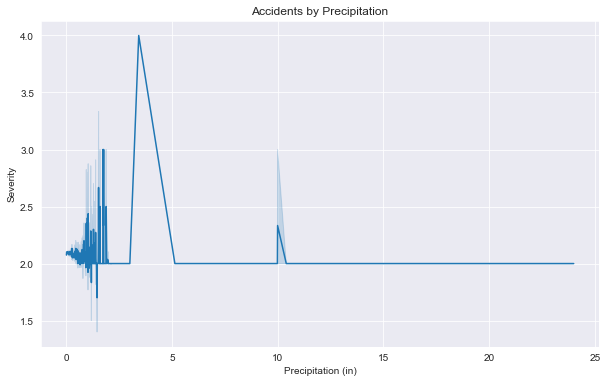

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Precipitation(in)', y='Severity', data=filtered_data)
plt.xlabel('Precipitation (in)')
plt.ylabel('Severity')
plt.title('Accidents by Precipitation')
plt.show()

## Summary && Insights